# Lab for module 3 lesson 1

Topics covered
- Measures of central tendency (mean, median, *etc.*)
- Measures of dispersion (variance, standard deviation, quantiles, *etc.*)
- Interpreting descriptive statistics

**Problem Statement & Data Description**

*Client: ABC Retail, Incorporated, rest-of-the-world division* 

***Project name: Online retail sales analysis*** 

An online retailer, ABC, Inc., operates in nearly 100 countries worldwide, selling furniture, office supplies and technology products to customers in three segments: consumer, corporate and home office. ABC, Inc. is a US-based company, and it has two major divisions: US and rest of the world. We are working with the rest of the world division of the company. 

They have provided us with online sales transaction data from 2011 to 2014.

We are given 3 datasets:-

1. Data on each sale; 51290 records; all data in US dollars
It contains fields like
**order_id** (identifier) ,order_date ,ship_date ,ship_mode ,**customer_id**(identifier) ,product_id ,category ,sub_category ,product_name ,sales ,quantity ,discount ,profit ,shipping_cost ,order_priority ,**vendor_code** (identifier) 


2. Data on the customers; 1590 records 
It contains fields like
**customer_id** (identifier) ,customer_name ,city ,state ,country ,postal_code ,segment ,market ,region 

3. Data on vendors who supply the retailer; 65 records 
It contains fields like
vendor ,**vendor_code** (identifier) 

We need to analyze the data and need to provide answer to different questions asked by company officials.

In [58]:
# reading the data , libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
# Use the warning filter context manager to temporarily suppress warnings
warnings.filterwarnings("ignore")

sales = pd.read_csv('sales_data.csv')
vendors=pd.read_csv('vendors.csv')
sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001
1,2,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,VE_002
2,3,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,VE_003
3,4,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,VE_004
4,5,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,VE_005


### Q1. In which year did the 'Furniture' category yield the highest average profit per transaction? And in which year was there the highest variability?

**Hint:** standard deviation is a good measure of variability in this context

In [22]:
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['year'] = sales['order_date'].dt.year

In [34]:
# write your code here
furniture_sales = sales[sales['category'] == 'Furniture']
furniture_sales = furniture_sales.groupby(['year']).mean(numeric_only=True)
furniture_sales.sort_values(by=['profit'],ascending=False,inplace=True)
print(f'Highest average profit per transaction was in {furniture_sales.index[0]}')
print(furniture_sales.head())

Highest average profit per transaction was in 2013
            row_id       sales  quantity  discount     profit  shipping_cost
year                                                                        
2013  23714.965834  410.625846  3.563556  0.168725  30.882770      43.737399
2011  25284.450057  429.167074  3.580590  0.173269  30.474987      46.653825
2012  23862.745721  420.001251  3.559413  0.164856  28.426814      43.711399
2014  24973.190021  411.728620  3.485509  0.166815  26.684214      44.718736


In [38]:
# write your code here
furniture_sales = sales[sales['category'] == 'Furniture']
furniture_sales = furniture_sales.groupby(['year'])['profit'].std()
furniture_sales.sort_values(ascending=False,inplace=True)
print(f'Highest profit variability was in {furniture_sales.index[0]}')
print(furniture_sales.head())

Highest profit variability was in 2014
year
2014    211.674021
2011    209.872495
2013    203.134299
2012    195.701074
Name: profit, dtype: float64


In [20]:
df.head()

row_id       sales  quantity  discount     profit  \
category   year                                                            
Technology 2014  25616.910564  467.773856  3.482489  0.131609  67.996484   
           2012  25671.684163  463.095706  3.482805  0.132875  66.052913   
           2013  25189.081162  475.541792  3.458302  0.134405  64.641323   
           2011  25466.106704  462.375453  3.440223  0.147002  61.032040   
Furniture  2013  23714.965834  410.625846  3.563556  0.168725  30.882770   

                 shipping_cost  
category   year                 
Technology 2014      49.239491  
           2012      50.695824  
           2013      50.460752  
           2011      49.916732  
Furniture  2013      43.737399

### Q2. Is there a big difference in the sales amounts between the different shipping modes? In other words, is there any pattern that suggests higher value sales prefer 'First Class' shipping while lower value sales prefer 'Standard' shipping?

You might not be able to answer this statistically at this point, but you will be able to make a very good estimate

ship_mode
First Class       1.784340e+06
Same Day          6.481297e+05
Second Class      2.486348e+06
Standard Class    7.327421e+06
Name: sales, dtype: float64


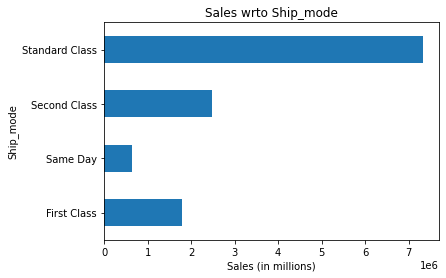

In [43]:
# write your code here
df = sales.groupby('ship_mode')['sales'].sum()
print(df)
df = df.plot(kind='barh')
plt.xlabel('Sales (in millions)')
plt.ylabel('Ship_mode')
plt.title('Sales wrto Ship_mode')
plt.show()

### Q3. Which vendor is associated with the smallest variation in sale amounts within the category 'Office Supplies'?

**Hint:**
- Use the vendor code, or get the vendor name from the vendors.csv data set)
- As before, standard deviation is a good measure of variation

In [46]:
vendors.head()

,vendor,vendor_code
0,Accenco,VE_001
1,Ace Corporation,VE_002
2,Nero,VE_003
3,Rushcorp,VE_004
4,Low Tide Corp,VE_005


In [47]:
# write your code here
df = sales[sales['category'] == 'Office Supplies']
df = df.merge(vendors,on='vendor_code',how='left')
df = df.groupby('vendor')['sales'].std().sort_values(ascending=True)
print(df.index[0])
df

Whizystems


vendor
Whizystems            165.079419
Alphacom              181.634773
Prodintelligence      205.799837
Nimbleworks           206.954561
Drift Co.             212.414831
Stormking             224.302796
Rushcorp              226.329751
Joytechs              233.768996
Accenco               250.169105
Arcanestar            254.156955
Primehive             254.978917
Venusystems           272.963854
Heroking              276.597895
Low Tide Corp         278.445763
Proton Solutions      294.167531
Riverlife             323.598174
Sailstones            329.168803
Fjord Technologies    341.161107
Purpleshack           366.025270
Ogre Solutions        388.718051
Cubemaster            388.873313
Lifoods               389.658123
Ansoft                417.759453
Moonlimited           431.770640
Lemon Systems         458.159534
Name: sales, dtype: float64

### Q4. Which subcategory has the smallest IQR and which one has the largest IQR for sales?

You might need a little bit of data manipulation to get this one

In [52]:
# write your code here
def get_iqr(data):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3 - q1
    return iqr

df = sales[['sub_category','sales']].groupby('sub_category')[['sales']].apply(get_iqr).sort_values(ascending=True)
print(f'Lowest IQR has {df.index[0]}')
print(f'Highest IQR has {df.index[-1]}')
print(df.head(2))
print(df.tail(2))
    

Lowest IQR has Labels
Highest IQR has Tables
sub_category
Labels       24.59625
Fasteners    30.44720
dtype: float64
sub_category
Appliances    617.335
Tables        783.684
dtype: float64


### Q5. Plot a histogram of shipping cost. How would you describe the distribution?

In [54]:
# write your code here
sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code,year
0,1,MX-2014-143658,2014-02-10,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001,2014
1,2,MX-2012-155047,2012-10-15,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,VE_002,2012
2,3,MX-2012-155047,2012-10-15,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,VE_003,2012
3,4,MX-2012-155047,2012-10-15,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,VE_004,2012
4,5,MX-2012-155047,2012-10-15,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,VE_005,2012


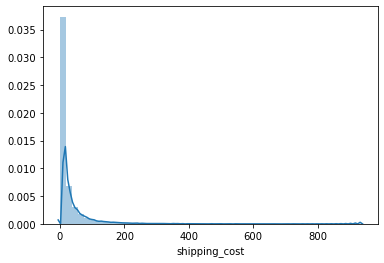

In [59]:
sns.distplot(sales['shipping_cost'])
plt.show()

#### The distribution is positively skewed

## Solutions

In [7]:
# Q.1:-
# write your code here

### Extracting yr from order date
sales['order_date']=pd.to_datetime(sales['order_date'],format='%d/%m/%Y')


sales['order_yr']=sales['order_date'].dt.year

### Subsetting for Furniture data
furniture_sales= sales[sales['category']=='Furniture']

### Grouping on order year and aggregating profits with sum
furniture_sales_mean=furniture_sales.groupby('order_yr')['profit'].mean().sort_values(ascending=False)
print(f"Category Furniture yield the highest average profit per transaction in year {furniture_sales_mean.index[0]}.")

### Grouping on order year and aggregating profits with standard_deviation
furniture_sales_std=furniture_sales.groupby('order_yr')['profit'].std().sort_values(ascending=False)
print(f"Category Furniture yield the highest variability for profit per transaction in year {furniture_sales_std.index[0]}.")


Category Furniture yield the highest average profit per transaction in year 2013.
Category Furniture yield the highest variability for profit per transaction in year 2014.


ship_mode
First Class       1.784340e+06
Same Day          6.481297e+05
Second Class      2.486348e+06
Standard Class    7.327421e+06
Name: sales, dtype: float64


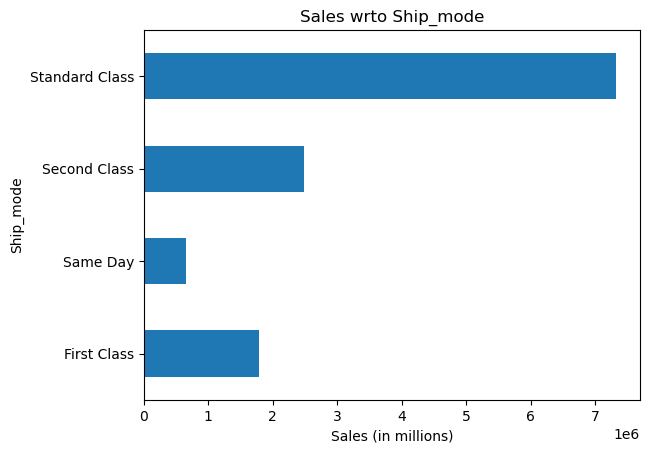

Difference in sales between standard class & first class is 5543080.335100001


In [8]:
# Q.2:-
### Grouping on ship mode and aggregating sales with sum
print(sales.groupby('ship_mode')['sales'].sum())

### Plotting sales for different shipping modes
sales.groupby('ship_mode')['sales'].sum().plot(kind='barh')
plt.xlabel('Sales (in millions)')
plt.ylabel('Ship_mode')
plt.title('Sales wrto Ship_mode')
plt.show()


sales_df=sales.groupby('ship_mode')['sales'].sum().reset_index()

### Calculating sales difference between standard class & first class
sdff_sc_fc=float(sales_df.loc[sales_df['ship_mode']=='Standard Class','sales'])-float(sales_df.loc[sales_df['ship_mode']=='First Class','sales'])
print(f'Difference in sales between standard class & first class is {sdff_sc_fc}')



In [9]:
# Q3 - ### In order to get sales details for vendors we need to merge the sales and vendor data.
sales=sales.merge(vendors,on='vendor_code',how='left')

In [10]:
# Continuing Q3 -
sales_os= sales[sales['category']=='Office Supplies']
sales_os.groupby('vendor')['sales'].std().sort_values(ascending=True)[0:1]

vendor
Whizystems    165.079419
Name: sales, dtype: float64

In [11]:
#Q.4:-
### IQR is basically difference between 3rd quartile & 1st quartile which tells you about spread.
def get_IQR(data):
    Q1= np.percentile(data,25)
    Q3= np.percentile(data,75)
    IQR= Q3- Q1
    return IQR

sales.groupby('sub_category')['sales'].apply(get_IQR).sort_values()
### As an exercise ,Extract the 1st & last values for IQR from this series.

sub_category
Labels          24.596250
Fasteners       30.447200
Binders         50.475000
Envelopes       67.126000
Paper           68.284350
Supplies        75.600000
Art             77.166800
Furnishings    117.480000
Accessories    206.955900
Storage        221.041000
Chairs         384.741750
Phones         420.140000
Machines       484.543125
Bookcases      524.820500
Copiers        546.590010
Appliances     617.335000
Tables         783.684000
Name: sales, dtype: float64

count    51290.000000
mean        26.375915
std         57.296804
min          0.000000
25%          2.610000
50%          7.790000
75%         24.450000
max        933.570000
Name: shipping_cost, dtype: float64


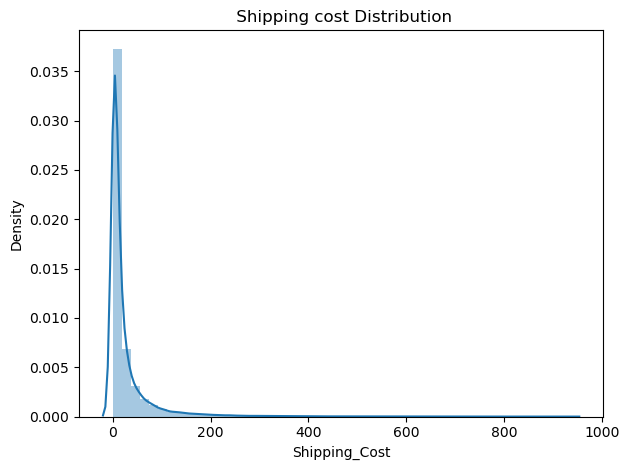

In [12]:
# Q5 - 

## Plotting distplot using seaborn 
sns.distplot(sales['shipping_cost'])
## plot title
plt.title(' Shipping cost Distribution')
## plot's x,y labels
plt.ylabel('Density')
plt.xlabel('Shipping_Cost')
plt.tight_layout()

print(sales['shipping_cost'].describe())

##### We could observe that the distribution is positively skewed.